In [1]:
#Importing the libraries
import pandas as pd 
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
#Importing the file
d = pd.read_csv("Desktop/CoronaDataUpdate.csv", sep=";",encoding = "ISO-8859-1", engine="python")

In [3]:
#Getting the first 6 rows of data
d.head()

,ï»¿COUNTRY,STATE,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE
0,USA,NaN,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN
1,Spain,NaN,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN
2,Italy,NaN,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN
3,Germany,NaN,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN
4,France,NaN,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN


In [4]:
#Getting the last 6 rows of data
d.tail()

,ï»¿COUNTRY,STATE,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE
202,Caribbean Netherlands,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
203,Falkland Islands,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,Papua New Guinea,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN
205,Timor-Leste,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,China,NaN,81639,3326.0,76755.0,1558,331.0,19.0,NaN,"0,612",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Getting the size of the dataset
d.size

3312

In [6]:
d.shape

(207, 16)

In [7]:
#Getting the number of missing values in each column
CoronaData = pd.read_csv("Desktop/CoronaData.csv",encoding = "ISO-8859-1")
null_columns=CoronaData.columns[CoronaData.isnull().any()]
CoronaData[null_columns].isnull().sum()

DATETIME;COUNTRY;STATE;TOTAL_CASES;TOTAL_DEATHS;TOTAL_RECOVERED;ACTIVE_CASES;SERIOUS_CRITICAL;NEW_CASES;NEW_DEATHS;DAILY_GROWTH_FACTOR;DAILY_GROWTH_FACTOR_RATIO;TOTAL_TESTS;TOTAL_CASES_PER_MILLION;DEATHS_PER_MILLION;TESTS_PER_MILLION;FIRST_CASE    81719
dtype: int64

In [8]:
#Checking if there are any missing values
d.isnull().values.any()

True

In [9]:
#Filling missing values with the mean values
d.fillna(d.mean(), inplace=True)
d.head()

,ï»¿COUNTRY,STATE,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE
0,USA,NaN,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN
1,Spain,NaN,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN
2,Italy,NaN,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN
3,Germany,NaN,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN
4,France,NaN,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN


In [10]:
d =d.drop(['STATE'], axis=1)

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
ï»¿COUNTRY                   207 non-null object
TOTAL_CASES                  207 non-null int64
TOTAL_DEATHS                 207 non-null float64
TOTAL_RECOVERED              207 non-null float64
ACTIVE_CASES                 207 non-null int64
SERIOUS_CRITICAL             207 non-null float64
NEW_CASES                    207 non-null float64
NEW_DEATHS                   0 non-null float64
DAILY_GROWTH_FACTOR          58 non-null object
DAILY_GROWTH_FACTOR_RATIO    0 non-null float64
TOTAL_TESTS                  207 non-null float64
TOTAL_CASES_PER_MILLION      0 non-null float64
DEATHS_PER_MILLION           0 non-null float64
TESTS_PER_MILLION            0 non-null float64
FIRST_CASE                   0 non-null float64
dtypes: float64(11), int64(2), object(2)
memory usage: 24.3+ KB


In [12]:
#Checking for basic statistic for the column TOTAL_CASES
d["TOTAL_CASES"].describe()

#the output displays the basic statistics for only the column "TOTAL_CASES"

count       207.000000
mean       5793.111111
std       27161.570051
min           1.000000
25%          19.500000
50%         201.000000
75%        1238.000000
max      309728.000000
Name: TOTAL_CASES, dtype: float64

In [13]:
#Detecting outliers
outliers=[]
def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [14]:
#Detecting outliers in column TOTAL_CASES
outlier_datapoints = detect_outlier(d["TOTAL_CASES"])
print(outlier_datapoints)

#below displays the outliers in column "TOTAL_CASES"

[309728, 126168, 124632, 96092, 89953, 81639]


In [15]:
#Checking if there are any missing values
d.isnull().values.any()

True

In [16]:
#Filling missing values with the mean values
d.fillna(d.mean(), inplace=True)
d.head()

,ï»¿COUNTRY,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE
0,USA,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN
1,Spain,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN
2,Italy,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN
3,Germany,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN
4,France,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN


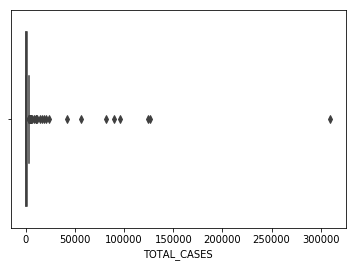

In [17]:
#Detecting outliers with boxplot
import seaborn as sns
sns.boxplot(x=d['TOTAL_CASES'])

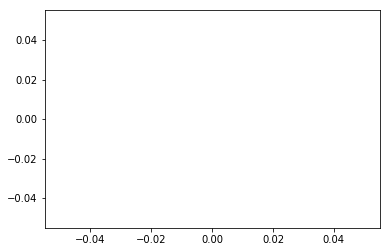

In [18]:
#K-means clustering
plt.scatter(d['TOTAL_DEATHS'], d['TESTS_PER_MILLION'], s = 50, c = 'y') 
plt.show()

In [19]:
#Question 1: there is no relation between total deaths and tests per million since tests per million column is null

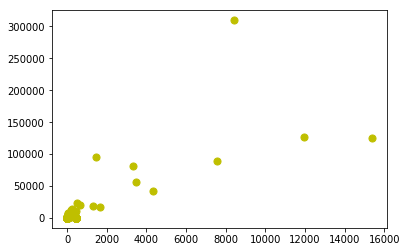

In [20]:
#K-means clustering
plt.scatter(d['TOTAL_DEATHS'], d['TOTAL_CASES'], s = 50, c = 'y') 
plt.show()

In [21]:
#Question 2: this means lower total number of cases will lower the total deaths

In [22]:
d.head()

,ï»¿COUNTRY,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,NEW_DEATHS,DAILY_GROWTH_FACTOR,DAILY_GROWTH_FACTOR_RATIO,TOTAL_TESTS,TOTAL_CASES_PER_MILLION,DEATHS_PER_MILLION,TESTS_PER_MILLION,FIRST_CASE
0,USA,309728,8441.0,14741.0,286546,8206.0,33907.0,NaN,"1,029",NaN,1626287.0,NaN,NaN,NaN,NaN
1,Spain,126168,11947.0,34219.0,80002,6532.0,6969.0,NaN,"0,976",NaN,355000.0,NaN,NaN,NaN,NaN
2,Italy,124632,15362.0,20996.0,88274,3994.0,4805.0,NaN,"1,047",NaN,657224.0,NaN,NaN,NaN,NaN
3,Germany,96092,1444.0,26400.0,68248,3936.0,4933.0,NaN,"0,775",NaN,918460.0,NaN,NaN,NaN,NaN
4,France,89953,7560.0,15438.0,66955,6838.0,25615.0,NaN,"4,894",NaN,224254.0,NaN,NaN,NaN,NaN


In [23]:
d =d.drop(['ï»¿COUNTRY','DAILY_GROWTH_FACTOR','DAILY_GROWTH_FACTOR_RATIO','NEW_DEATHS','TOTAL_CASES_PER_MILLION','DEATHS_PER_MILLION', 'TESTS_PER_MILLION','FIRST_CASE'], axis=1)

#dropping all null columns

In [24]:
d.head()

,TOTAL_CASES,TOTAL_DEATHS,TOTAL_RECOVERED,ACTIVE_CASES,SERIOUS_CRITICAL,NEW_CASES,TOTAL_TESTS
0,309728,8441.0,14741.0,286546,8206.0,33907.0,1626287.0
1,126168,11947.0,34219.0,80002,6532.0,6969.0,355000.0
2,124632,15362.0,20996.0,88274,3994.0,4805.0,657224.0
3,96092,1444.0,26400.0,68248,3936.0,4933.0,918460.0
4,89953,7560.0,15438.0,66955,6838.0,25615.0,224254.0


In [25]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(d)
data_transformed = mms.transform(d)

/Users/selinkucukoglu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
#K means with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(d)
kmeans.cluster_centers_

array([[3.27089163e+03, 3.17936225e+02, 1.22290454e+03, 2.17200000e+03,
        2.89344449e+02, 1.56000527e+03, 4.52104357e+04],
       [1.33795750e+05, 6.32250000e+03, 1.56175000e+04, 1.11855750e+05,
        4.03600000e+03, 1.10567500e+04, 9.60394250e+05]])

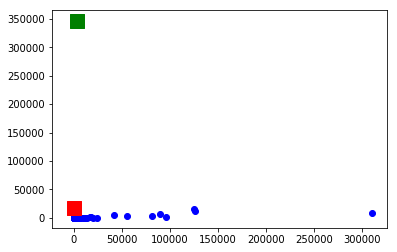

In [27]:
plt.scatter(d['TOTAL_CASES'], d['TOTAL_DEATHS'], c = 'b')
plt.scatter(3.27089163e+03 , 3.46871400e+05, s=200, c='g', marker='s')
plt.scatter(4.40273432e+02, 1.79902000e+04, s=200, c='r', marker='s')
plt.show()

In [28]:
#Checking for basic statistic for the column TOTAL_DEATHS
d["TOTAL_DEATHS"].describe()

count      207.000000
mean       433.966443
std       1601.850866
min          1.000000
25%          4.000000
50%         32.000000
75%        433.966443
max      15362.000000
Name: TOTAL_DEATHS, dtype: float64

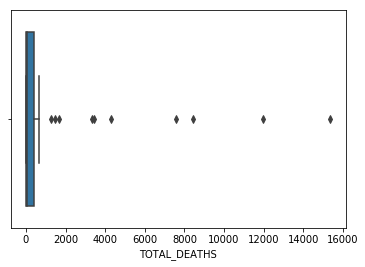

In [29]:
sns.boxplot(x=d['TOTAL_DEATHS'])

In [30]:
#Question 3: average number of deaths is 433.

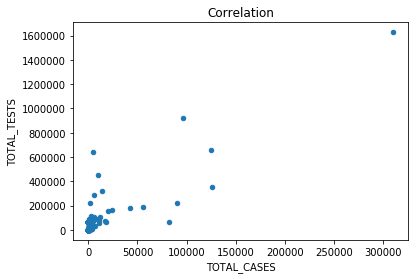

In [31]:
d.plot.scatter(x='TOTAL_CASES', y='TOTAL_TESTS', title='Correlation')

In [32]:
#Question 4: positive relationship between total number of cases and total number of tests